In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
import mlrose_hiive
import time

In [20]:
import random
from numpy.random import seed
random.seed(36)
seed(36)
tf.random.set_seed(36)
np.random.seed(36)
import os
os.environ['PYTHONHASHSEED'] = '0'
tf.keras.utils.set_random_seed(36)
tf.config.experimental.enable_op_determinism()

In [21]:
# Read the data
df = pd.read_csv('./diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [22]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X.shape, y.shape

((768, 8), (768,))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [24]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [25]:
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.optimizer.lr = 0.05

In [26]:
model.fit(x=X_train_s, y=y_train, batch_size=32, epochs=20, verbose=2)

Epoch 1/20
17/17 - 0s - loss: 0.5583 - accuracy: 0.7039 - 271ms/epoch - 16ms/step
Epoch 2/20
17/17 - 0s - loss: 0.4718 - accuracy: 0.7728 - 65ms/epoch - 4ms/step
Epoch 3/20
17/17 - 0s - loss: 0.4466 - accuracy: 0.7840 - 36ms/epoch - 2ms/step
Epoch 4/20
17/17 - 0s - loss: 0.4538 - accuracy: 0.7989 - 41ms/epoch - 2ms/step
Epoch 5/20
17/17 - 0s - loss: 0.4384 - accuracy: 0.7914 - 42ms/epoch - 2ms/step
Epoch 6/20
17/17 - 0s - loss: 0.4285 - accuracy: 0.8007 - 39ms/epoch - 2ms/step
Epoch 7/20
17/17 - 0s - loss: 0.4300 - accuracy: 0.7877 - 32ms/epoch - 2ms/step
Epoch 8/20
17/17 - 0s - loss: 0.4185 - accuracy: 0.8045 - 34ms/epoch - 2ms/step
Epoch 9/20
17/17 - 0s - loss: 0.4209 - accuracy: 0.7970 - 31ms/epoch - 2ms/step
Epoch 10/20
17/17 - 0s - loss: 0.4119 - accuracy: 0.7989 - 34ms/epoch - 2ms/step
Epoch 11/20
17/17 - 0s - loss: 0.4206 - accuracy: 0.7989 - 31ms/epoch - 2ms/step
Epoch 12/20
17/17 - 0s - loss: 0.4088 - accuracy: 0.8082 - 30ms/epoch - 2ms/step
Epoch 13/20
17/17 - 0s - loss: 0.42

In [27]:
y_pred = model.predict(X_test_s)
prediction  = [1 if y>=0.5 else 0 for y in y_pred]
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, prediction))) 

8/8 [==============================] - 0s 786us/step
Accuracy score: 0.7359


In [28]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, prediction))
print('\n')
print("Classfication Report:")
print(classification_report(y_test, prediction)) 

Confusion Matrix:
[[121  29]
 [ 32  49]]


Classfication Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       150
           1       0.63      0.60      0.62        81

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.74      0.73       231



In [29]:
# backpropagation/gradient descent
clf_gd = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                           algorithm = 'gradient_descent',early_stopping = True,
                           max_attempts = 100, max_iters = 5000, is_classifier = True,
                           bias = True, learning_rate = 0.05,
                           restarts=0, curve = True, random_state=36)

start_time = time.time()
clf_gd.fit(X_train_s, y_train)
end_time = time.time()
time_bp = end_time-start_time
y_pred = clf_gd.predict(X_test_s)
final_score_gd = accuracy_score(y_test, y_pred)
fitness_curve_gd = clf_gd.fitness_curve
print('Accuracy score: {:.4f}'.format(final_score_gd))
print('Time: {:.4f}'.format(time_bp))

Accuracy score: 0.6494
Time: 0.1260


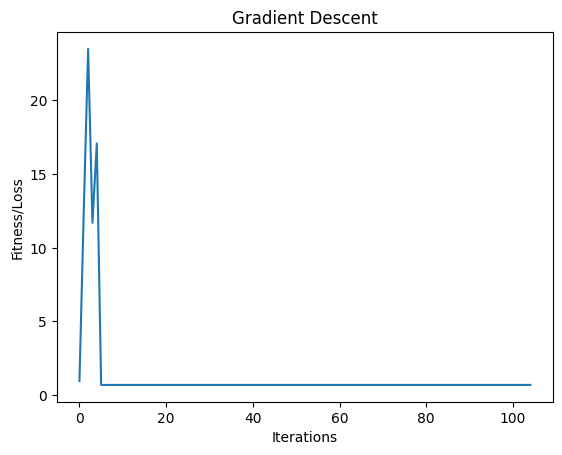

In [30]:
plt.plot(-fitness_curve_gd)
plt.title('Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Fitness/Loss')
plt.show()

In [31]:
# learning rate vs accuracy for gradient descent
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
train_accuracy = []
test_accuracy = []
time_gd = []
for lr in learning_rate:
    clf_gd = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                               algorithm = 'gradient_descent',early_stopping = True,
                               max_attempts = 100, max_iters = 5000, is_classifier = True,
                               bias = True, learning_rate = lr,
                               restarts=0, curve = True, random_state=36)
    start_time = time.time()
    clf_gd.fit(X_train_s, y_train)
    end_time = time.time()
    y_pred = clf_gd.predict(X_test_s)
    final_score_gd = accuracy_score(y_test, y_pred)
    test_accuracy.append(final_score_gd)
    y_pred_t = clf_gd.predict(X_train_s)
    final_score_ga_t = accuracy_score(y_train, y_pred_t)
    train_accuracy.append(final_score_ga_t)
    time_gd.append(end_time-start_time)

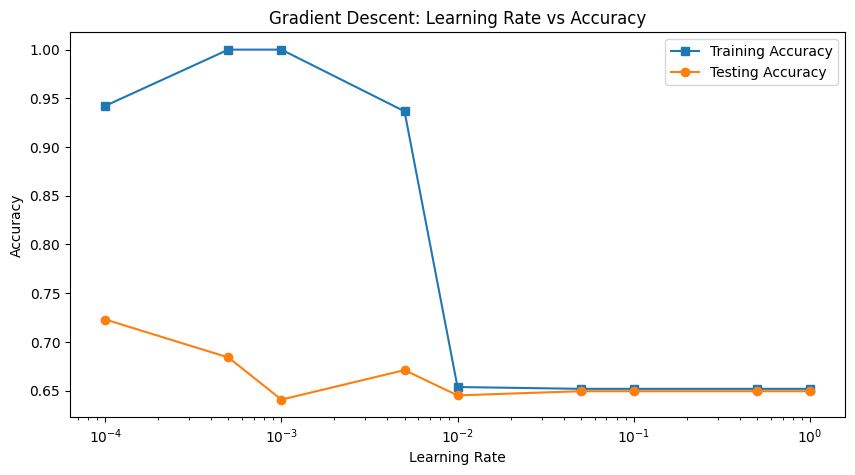

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(learning_rate, train_accuracy, label='Training Accuracy', marker='s')
plt.plot(learning_rate, test_accuracy, label='Testing Accuracy', marker='o')
plt.legend()
plt.title('Gradient Descent: Learning Rate vs Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

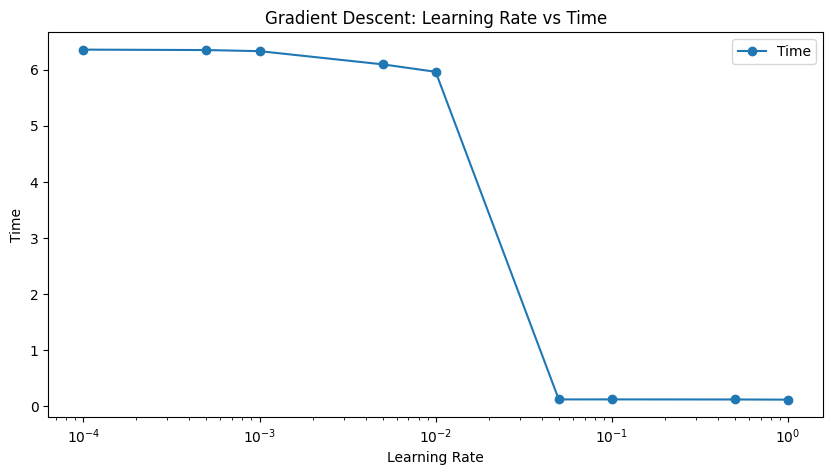

In [33]:
# learning rate vs time for gradient descent
plt.figure(figsize=(10, 5))
plt.plot(learning_rate, time_gd, label='Time', marker='o') 
plt.legend()
plt.title('Gradient Descent: Learning Rate vs Time')
plt.xlabel('Learning Rate')
plt.ylabel('Time')
plt.xscale('log')
plt.show()

In [34]:
# random hill climbing
clf_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                            algorithm = 'random_hill_climb',early_stopping = True,
                            max_attempts = 100, max_iters = 5000, is_classifier = True,
                            bias = True, learning_rate = 0.05,
                            restarts=0, curve = True, random_state=36)

start_time = time.time()
clf_rhc.fit(X_train_s, y_train)
end_time = time.time()
time_rhc = end_time-start_time
y_pred = clf_rhc.predict(X_test_s)
final_score_rhc = accuracy_score(y_test, y_pred)
fitness_curve_rhc = clf_rhc.fitness_curve
print('Accuracy score: {:.4f}'.format(final_score_rhc))
print('Time: {:.4f}'.format(time_rhc))

Accuracy score: 0.6883
Time: 3.7039


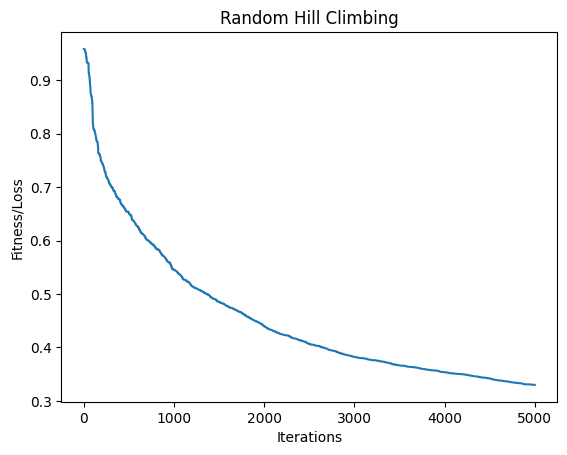

In [35]:
plt.plot(fitness_curve_rhc[:,0])
plt.title('Random Hill Climbing')
plt.xlabel('Iterations')
plt.ylabel('Fitness/Loss')
plt.show()

In [36]:
# restarts vs accuracy for random hill climbing
restarts = [0, 2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50]
train_accuracy = []
test_accuracy = []
time_rhc = []
for r in restarts:
    clf_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                                algorithm = 'random_hill_climb',early_stopping = True,
                                max_attempts = 100, max_iters = 5000, is_classifier = True,
                                bias = True, learning_rate = 0.05,
                                restarts = r, curve = True, random_state=36)
    start_time = time.time()
    clf_rhc.fit(X_train_s, y_train)
    end_time = time.time()
    y_pred = clf_rhc.predict(X_test_s)
    final_score_rhc = accuracy_score(y_test, y_pred)
    y_pred_t = clf_rhc.predict(X_train_s)
    final_score_ga_t = accuracy_score(y_train, y_pred_t)
    train_accuracy.append(final_score_ga_t)
    test_accuracy.append(final_score_rhc)
    time_rhc.append(end_time-start_time)

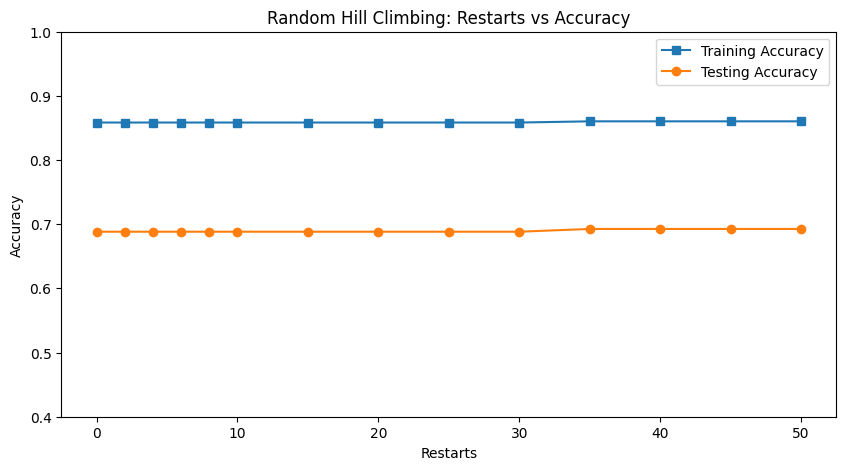

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(restarts, train_accuracy, label='Training Accuracy', marker='s')
plt.plot(restarts, test_accuracy, label='Testing Accuracy', marker='o')
plt.legend()
plt.title('Random Hill Climbing: Restarts vs Accuracy')
plt.xlabel('Restarts')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1)
plt.show()

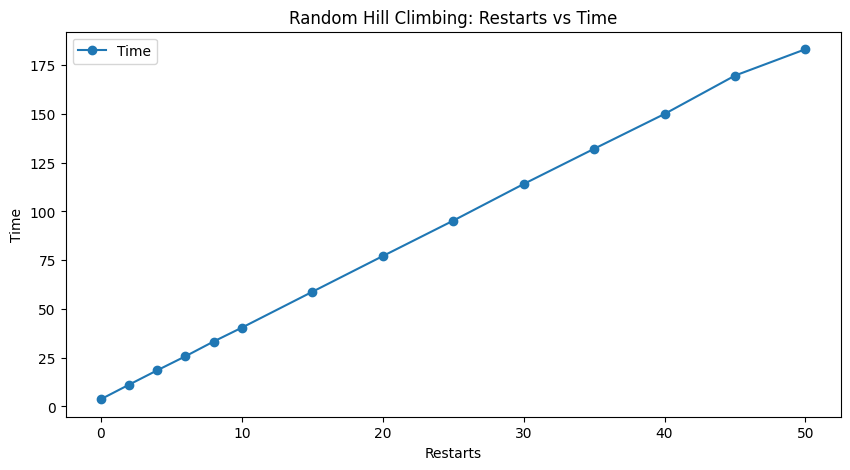

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(restarts, time_rhc, label='Time', marker='o')
plt.legend()
plt.title('Random Hill Climbing: Restarts vs Time')
plt.xlabel('Restarts')
plt.ylabel('Time')
plt.show()

In [39]:
# simulated annealing
clf_sa = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                            algorithm = 'simulated_annealing',early_stopping = True,
                            max_attempts = 100, max_iters = 5000, is_classifier = True,
                            bias = True, learning_rate = 0.05,
                            restarts=0, curve = True, random_state=36)

start_time = time.time()
clf_sa.fit(X_train_s, y_train)
end_time = time.time()
time_sa = end_time-start_time
y_pred = clf_sa.predict(X_test_s)
final_score_sa = accuracy_score(y_test, y_pred)
fitness_curve_sa = clf_sa.fitness_curve
print('Accuracy score: {:.4f}'.format(final_score_sa))
print('Time: {:.4f}'.format(time_sa))

Accuracy score: 0.7100
Time: 4.8063


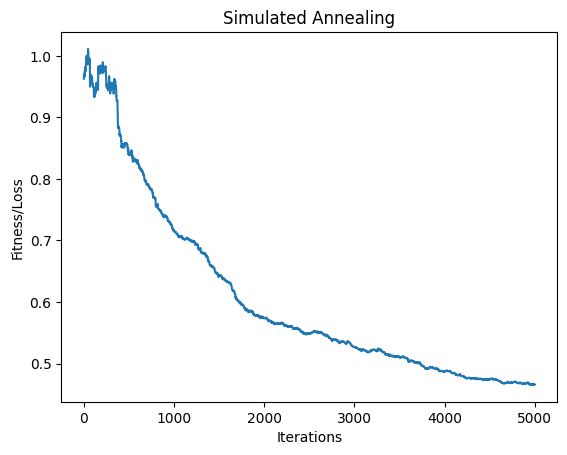

In [40]:
plt.plot(fitness_curve_sa[:,0])
plt.title('Simulated Annealing')
plt.xlabel('Iterations')
plt.ylabel('Fitness/Loss')
plt.show()

In [41]:
# initial temperature vs accuracy for simulated annealing
initial_temperature = [0.1, 0.5, 1, 5, 10, 20, 30, 40, 50]
train_accuracy = []
test_accuracy = []
time_sa = []
for t in initial_temperature:
    clf_sa = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                                algorithm = 'simulated_annealing',early_stopping = True,
                                max_attempts = 100, max_iters = 5000, is_classifier = True,
                                bias = True, learning_rate = 0.05,
                                restarts=0, curve = True, random_state=36, schedule=mlrose_hiive.GeomDecay(init_temp=t))
    start_time = time.time()
    clf_sa.fit(X_train_s, y_train)
    end_time = time.time()
    y_pred = clf_sa.predict(X_test_s)
    final_score_sa = accuracy_score(y_test, y_pred)
    y_pred_t = clf_sa.predict(X_train_s)
    final_score_ga_t = accuracy_score(y_train, y_pred_t)
    train_accuracy.append(final_score_ga_t)
    test_accuracy.append(final_score_sa)
    time_sa.append(end_time-start_time)

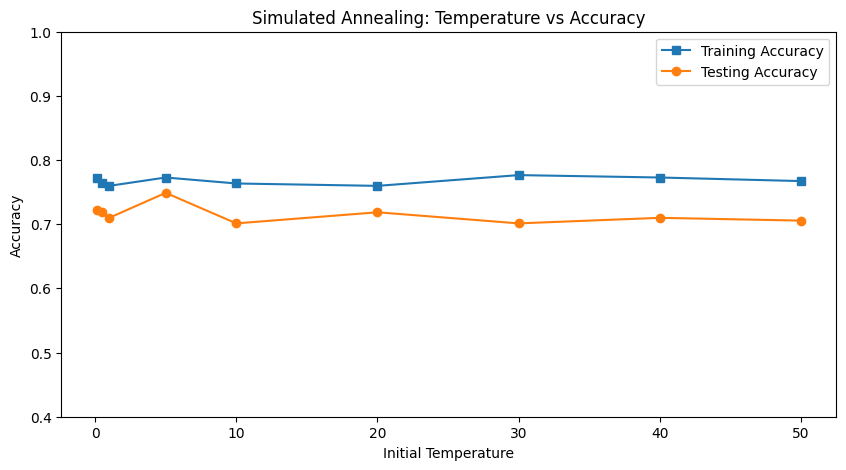

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(initial_temperature, train_accuracy, label='Training Accuracy', marker='s')
plt.plot(initial_temperature, test_accuracy, label='Testing Accuracy', marker='o')
plt.legend()
plt.title('Simulated Annealing: Temperature vs Accuracy')
plt.xlabel('Initial Temperature')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1)
plt.show()

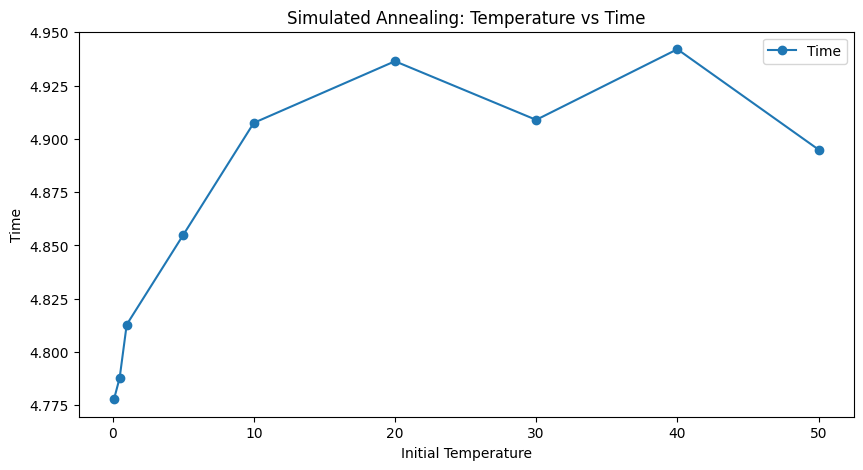

In [43]:
# initial temperature vs time for simulated annealing
plt.figure(figsize=(10, 5))
plt.plot(initial_temperature, time_sa, label='Time', marker='o')
plt.legend()
plt.title('Simulated Annealing: Temperature vs Time')
plt.xlabel('Initial Temperature')
plt.ylabel('Time')
plt.show()

In [44]:
# decay rate vs accuracy for simulated annealing
decay_rate = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 0.999]
train_accuracy = []
test_accuracy = []
time_sa = []
for d in decay_rate:
    clf_sa = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                                algorithm = 'simulated_annealing',early_stopping = True,
                                max_attempts = 100, max_iters = 5000, is_classifier = True,
                                bias = True, learning_rate = 0.05,
                                restarts=0, curve = True, random_state=36, schedule=mlrose_hiive.GeomDecay(decay=d))
    start_time = time.time()
    clf_sa.fit(X_train_s, y_train)
    end_time = time.time()
    y_pred = clf_sa.predict(X_test_s)
    final_score_sa = accuracy_score(y_test, y_pred)
    y_pred_t = clf_sa.predict(X_train_s)
    final_score_ga_t = accuracy_score(y_train, y_pred_t)
    train_accuracy.append(final_score_ga_t)
    test_accuracy.append(final_score_sa)
    time_sa.append(end_time-start_time)

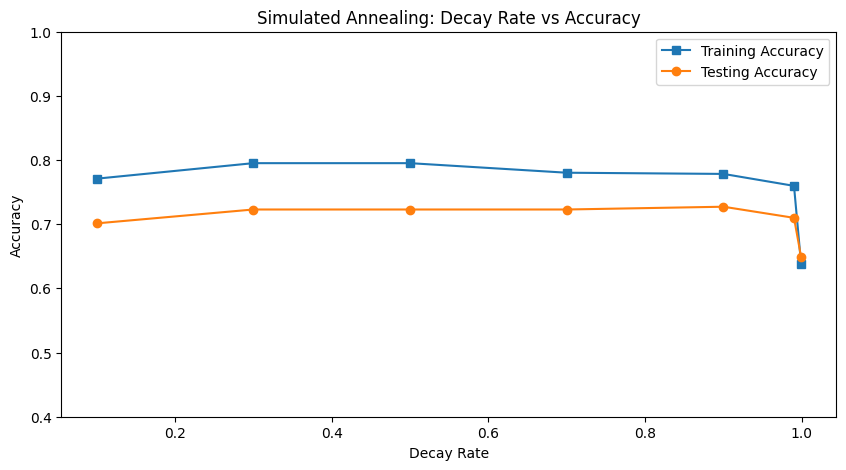

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(decay_rate, train_accuracy, label='Training Accuracy', marker='s')
plt.plot(decay_rate, test_accuracy, label='Testing Accuracy', marker='o')
plt.legend()
plt.title('Simulated Annealing: Decay Rate vs Accuracy')
plt.xlabel('Decay Rate')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1)
plt.show()

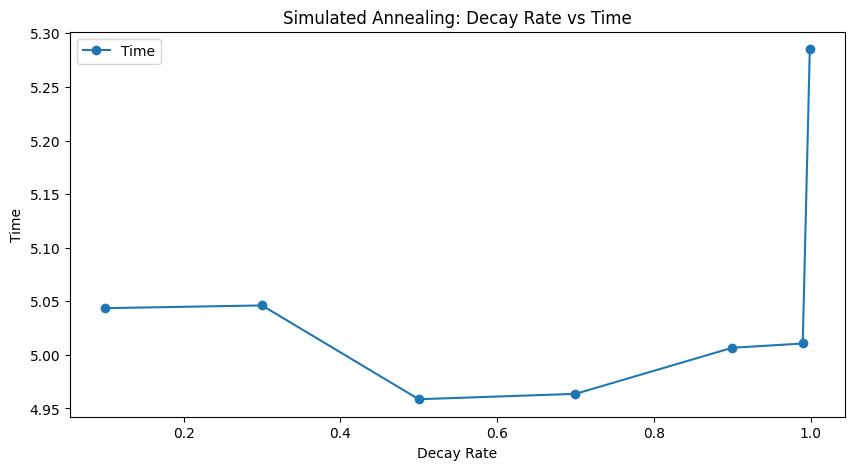

In [46]:
# decay rate vs time for simulated annealing
plt.figure(figsize=(10, 5))
plt.plot(decay_rate, time_sa, label='Time', marker='o')
plt.legend()
plt.title('Simulated Annealing: Decay Rate vs Time')
plt.xlabel('Decay Rate')
plt.ylabel('Time')
plt.show()

In [47]:
# minimum temperature vs accuracy for simulated annealing
min_temperature = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
train_accuracy = []
test_accuracy = []
time_sa = []
for mt in min_temperature:
    clf_sa = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                                algorithm = 'simulated_annealing',early_stopping = True,
                                max_attempts = 100, max_iters = 5000, is_classifier = True,
                                bias = True, learning_rate = 0.05,
                                restarts=0, curve = True, random_state=36, schedule=mlrose_hiive.GeomDecay(min_temp=mt))
    start_time = time.time()
    clf_sa.fit(X_train_s, y_train)
    end_time = time.time()
    y_pred = clf_sa.predict(X_test_s)
    final_score_sa = accuracy_score(y_test, y_pred)
    y_pred_t = clf_sa.predict(X_train_s)
    final_score_ga_t = accuracy_score(y_train, y_pred_t)
    train_accuracy.append(final_score_ga_t)
    test_accuracy.append(final_score_sa)
    time_sa.append(end_time-start_time)

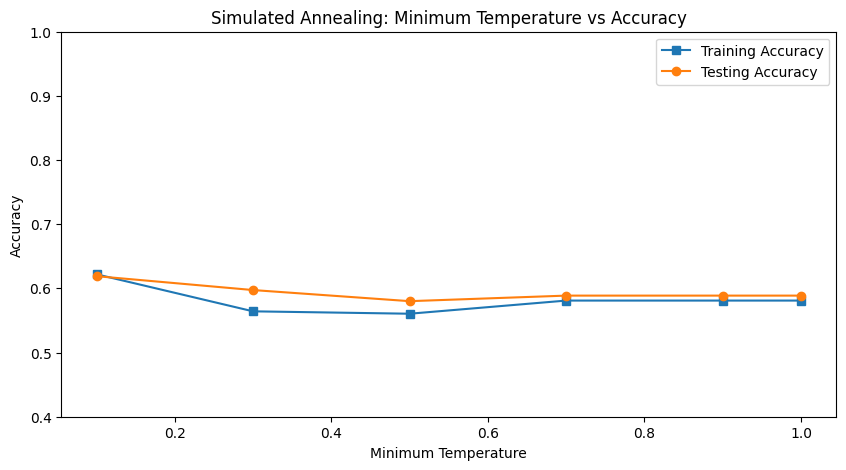

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(min_temperature, train_accuracy, label='Training Accuracy', marker='s')
plt.plot(min_temperature, test_accuracy, label='Testing Accuracy', marker='o')
plt.legend()
plt.title('Simulated Annealing: Minimum Temperature vs Accuracy')
plt.xlabel('Minimum Temperature')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1)
plt.show()

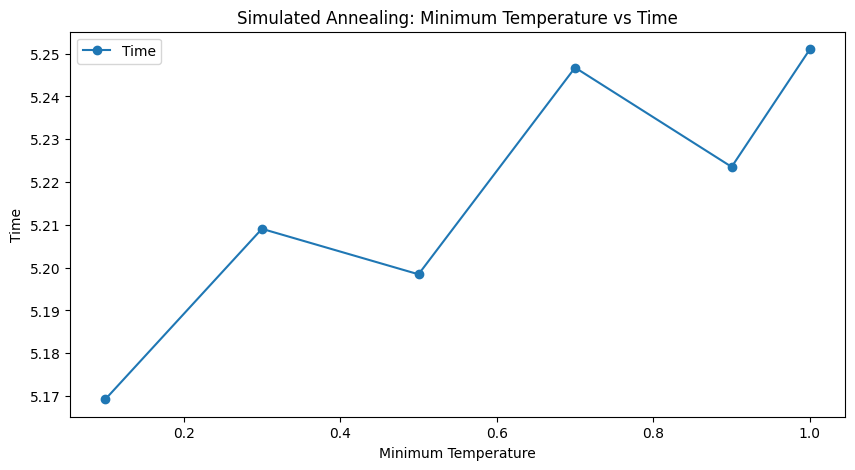

In [49]:
# minimum temperature vs time for simulated annealing
plt.figure(figsize=(10, 5))
plt.plot(min_temperature, time_sa, label='Time', marker='o')
plt.legend()
plt.title('Simulated Annealing: Minimum Temperature vs Time')
plt.xlabel('Minimum Temperature')
plt.ylabel('Time')
plt.show()

In [50]:
# genetic algorithm
clf_ga = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                            algorithm = 'genetic_alg',
                            # early_stopping = True,
                            max_attempts = 100, max_iters = 5000, is_classifier = True,
                            bias = True, learning_rate = 0.05,
                            restarts=0, curve = True, random_state=36)

start_time = time.time()
clf_ga.fit(X_train_s, y_train)
end_time = time.time()
time_ga = end_time-start_time
y_pred = clf_ga.predict(X_test_s)
final_score_ga = accuracy_score(y_test, y_pred)
fitness_curve_ga = clf_ga.fitness_curve
print('Accuracy score: {:.4f}'.format(final_score_ga))
print('Time: {:.4f}'.format(time_ga))

Accuracy score: 0.7792
Time: 599.4519


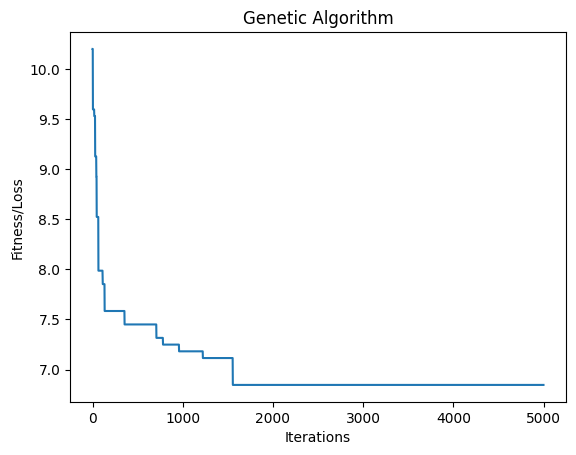

In [51]:
plt.plot(fitness_curve_ga[:,0])
plt.title('Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Fitness/Loss')
plt.show()

In [52]:
# population size vs accuracy for genetic algorithm
population_size = [50, 100, 200, 300, 400, 500]
train_accuracy = []
test_accuracy = []
time_ga = []
for p in population_size:
    clf_ga = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                                algorithm = 'genetic_alg',early_stopping = True,
                                max_attempts = 100, max_iters = 5000, is_classifier = True,
                                bias = True, learning_rate = 0.05,
                                restarts=0, curve = True, random_state=36, pop_size=p)
    start_time = time.time()
    clf_ga.fit(X_train_s, y_train)
    end_time = time.time()
    y_pred = clf_ga.predict(X_test_s)
    final_score_ga = accuracy_score(y_test, y_pred)
    y_pred_t = clf_ga.predict(X_train_s)
    final_score_ga_t = accuracy_score(y_train, y_pred_t)
    train_accuracy.append(final_score_ga_t)
    test_accuracy.append(final_score_ga)
    time_ga.append(end_time-start_time)

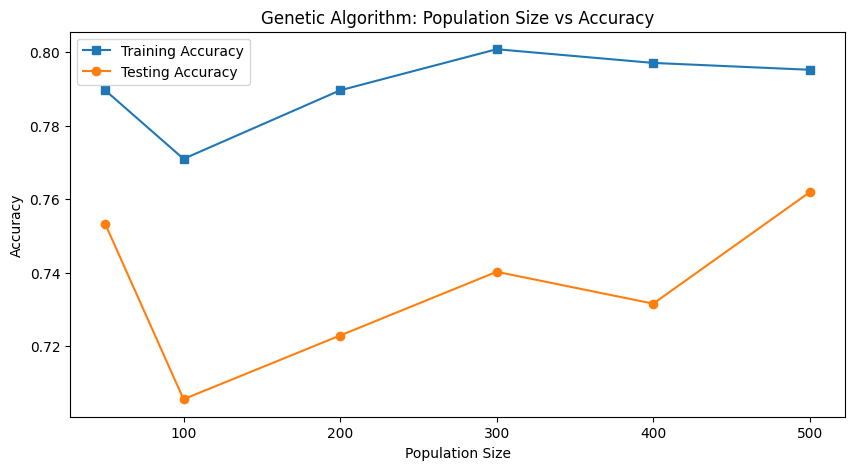

In [53]:
plt.figure(figsize=(10, 5))
plt.plot(population_size, train_accuracy, label='Training Accuracy', marker='s')
plt.plot(population_size, test_accuracy, label='Testing Accuracy', marker='o')
plt.legend()
plt.title('Genetic Algorithm: Population Size vs Accuracy')
plt.xlabel('Population Size')
plt.ylabel('Accuracy')
plt.show()

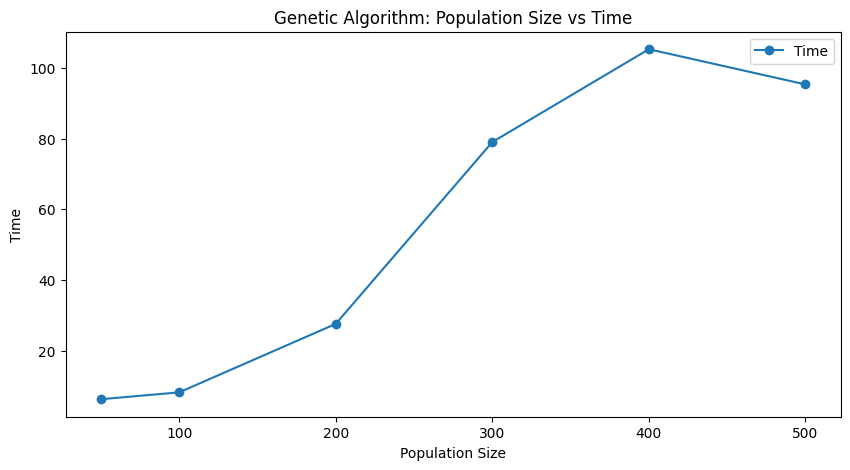

In [54]:
# population size vs time for genetic algorithm
plt.figure(figsize=(10, 5))
plt.plot(population_size, time_ga, label='Time', marker='o')
plt.legend()
plt.title('Genetic Algorithm: Population Size vs Time')
plt.xlabel('Population Size')
plt.ylabel('Time')
plt.show()

In [55]:
# mutation probability vs accuracy for genetic algorithm
mutation_prob = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
train_accuracy = []
test_accuracy = []
time_ga = []
for mp in mutation_prob:
    clf_ga = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                                algorithm = 'genetic_alg',early_stopping = True,
                                max_attempts = 100, max_iters = 5000, is_classifier = True,
                                bias = True, learning_rate = 0.05,
                                restarts=0, curve = True, random_state=36, mutation_prob=mp)
    start_time = time.time()
    clf_ga.fit(X_train_s, y_train)
    end_time = time.time()
    y_pred = clf_ga.predict(X_test_s)
    final_score_ga = accuracy_score(y_test, y_pred)
    y_pred_t = clf_ga.predict(X_train_s)
    final_score_ga_t = accuracy_score(y_train, y_pred_t)
    train_accuracy.append(final_score_ga_t)
    test_accuracy.append(final_score_ga)
    time_ga.append(end_time-start_time)

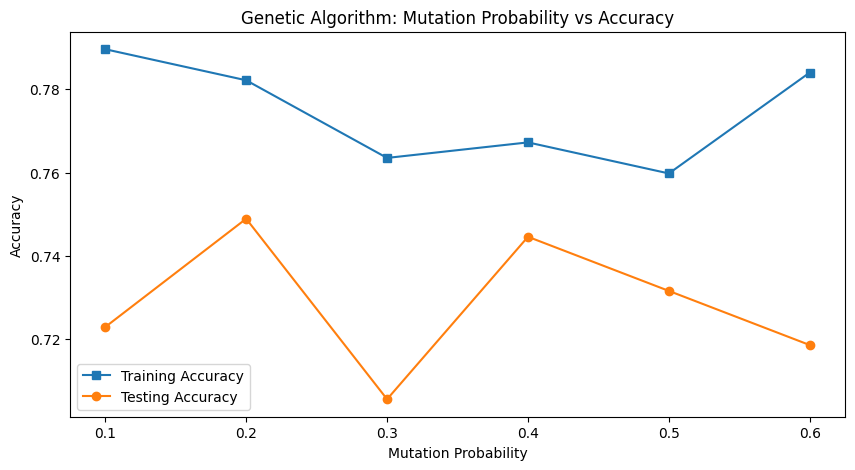

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(mutation_prob, train_accuracy, label='Training Accuracy', marker='s')
plt.plot(mutation_prob, test_accuracy, label='Testing Accuracy', marker='o')
plt.legend()
plt.title('Genetic Algorithm: Mutation Probability vs Accuracy')
plt.xlabel('Mutation Probability')
plt.ylabel('Accuracy')
plt.show()

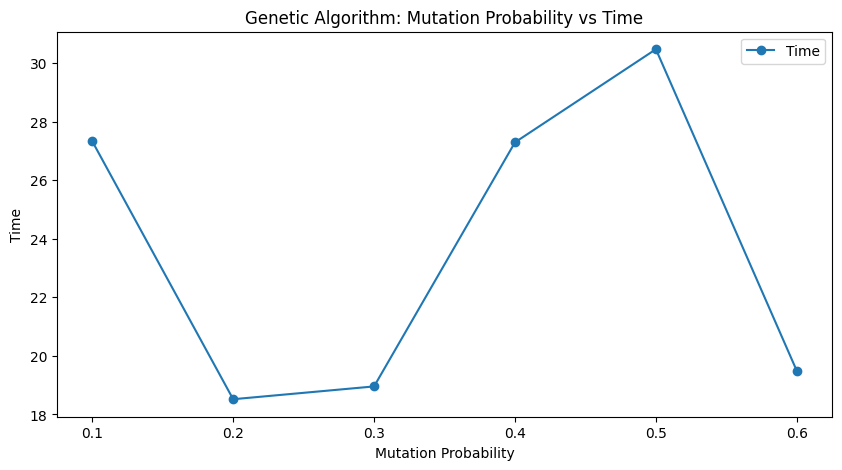

In [57]:
# mutation probability vs time for genetic algorithm
plt.figure(figsize=(10, 5))
plt.plot(mutation_prob, time_ga, label='Time', marker='o')
plt.legend()
plt.title('Genetic Algorithm: Mutation Probability vs Time')
plt.xlabel('Mutation Probability')
plt.ylabel('Time')
plt.show()

In [58]:
# backpropagation/gradient descent
test_acc_gd = []
for i in range(0, 5000,200):
    clf_gd = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                                        algorithm = 'gradient_descent',early_stopping = True,
                                        max_attempts = 100, max_iters = i, is_classifier = True,
                                        bias = True, learning_rate = 0.05,
                                        restarts=0, curve = True, random_state=36)

    start_time = time.time()
    clf_gd.fit(X_train_s, y_train)
    end_time = time.time()
    time_bp = end_time-start_time
    y_pred = clf_gd.predict(X_test_s)
    final_score_gd = accuracy_score(y_test, y_pred)
    test_acc_gd.append(final_score_gd)

# random hill climbing
test_acc_rhc = []
for i in range(0, 5000,200):
    clf_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                                algorithm = 'random_hill_climb',early_stopping = True,
                                max_attempts = 100, max_iters = i, is_classifier = True,
                                bias = True, learning_rate = 0.05,
                                restarts=0, curve = True, random_state=36)

    start_time = time.time()
    clf_rhc.fit(X_train_s, y_train)
    end_time = time.time()
    time_rhc = end_time-start_time
    y_pred = clf_rhc.predict(X_test_s)
    final_score_rhc = accuracy_score(y_test, y_pred)
    test_acc_rhc.append(final_score_rhc)

# simulated annealing
test_acc_sa = []
for i in range(0, 5000,200):
    clf_sa = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                                algorithm = 'simulated_annealing',early_stopping = True,
                                max_attempts = 100, max_iters = i, is_classifier = True,
                                bias = True, learning_rate = 0.05,
                                restarts=0, curve = True, random_state=36)

    start_time = time.time()
    clf_sa.fit(X_train_s, y_train)
    end_time = time.time()
    time_sa = end_time-start_time
    y_pred = clf_sa.predict(X_test_s)
    final_score_sa = accuracy_score(y_test, y_pred)
    test_acc_sa.append(final_score_sa)

# genetic algorithm
test_acc_ga = []
for i in range(0, 5000,200):
    clf_ga = mlrose_hiive.NeuralNetwork(hidden_nodes=[16, 16], activation='relu',
                                algorithm = 'genetic_alg',early_stopping = True,
                                max_attempts = 100, max_iters = i, is_classifier = True,
                                bias = True, learning_rate = 0.05,
                                restarts=0, curve = True, random_state=36)

    start_time = time.time()
    clf_ga.fit(X_train_s, y_train)
    end_time = time.time()
    time_ga = end_time-start_time
    y_pred = clf_ga.predict(X_test_s)
    final_score_ga = accuracy_score(y_test, y_pred)
    test_acc_ga.append(final_score_ga)


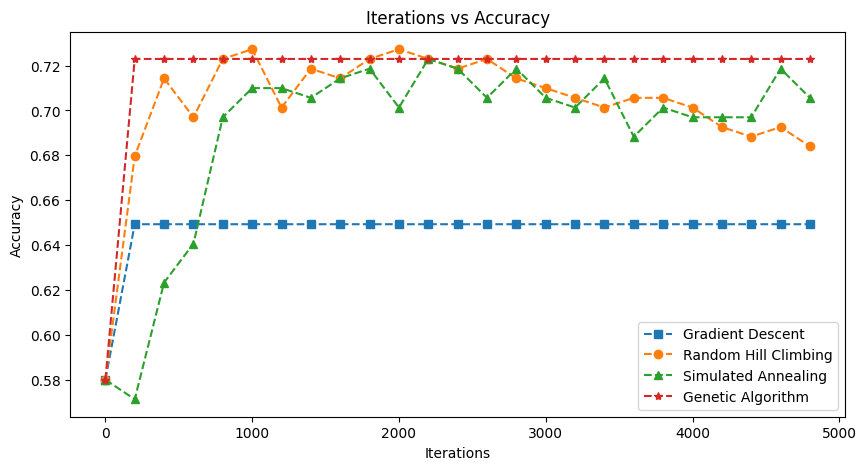

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(range(0, 5000, 200), test_acc_gd, label='Gradient Descent', marker='s', linestyle='--')
plt.plot(range(0, 5000, 200), test_acc_rhc, label='Random Hill Climbing', marker='o', linestyle='--')
plt.plot(range(0, 5000, 200), test_acc_sa, label='Simulated Annealing', marker='^', linestyle='--')
plt.plot(range(0, 5000, 200), test_acc_ga, label='Genetic Algorithm', marker='*', linestyle='--')
plt.legend()
plt.title('Iterations vs Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()